# Recurrent Neural Network in Keras

In this notebook, we use an RNN to classify IMDB movie reviews by their sentiment.

In [1]:
!pip install watermark
!pip install nltk
!pip install theano
!pip install mxnet
!pip install chainer
!pip install seaborn
!pip install keras
!pip install scikit-image
!pip install tqdm
!pip install tflearn
!pip install h5py 

    100% |████████████████████████████████| 1.2MB 1.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/18/9c/1f/276bc3f421614062468cb1c9d695e6086d0c73d67ea363c501
Successfully built nltk
    100% |████████████████████████████████| 2.8MB 473kB/s eta 0:00:01
  Running setup.py bdist_wheel for theano ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/a2/7d/b4cac381d5151daa9f9e0b3e4e4b65edaea6355ae296c97cf2
Successfully built theano
    100% |████████████████████████████████| 27.5MB 48kB/s  eta 0:00:01 1% |▍                               | 327kB 5.7MB/s eta 0:00:05
    100% |████████████████████████████████| 92kB 9.8MB/s eta 0:00:01
    100% |████████████████████████████████| 153kB 7.6MB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 8.6MB/s eta 0:00:01
    100% |████████████████████████████████| 143kB 8.6MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 10.2MB/s ta 0:00:01


    46% |██████████████▉                 | 2.7MB 34.4MB/s eta 0:00:01

    84% |███████████████████████████     | 4.8MB 49.4MB/s eta 0:00:01

    100% |████████████████████████████████| 5.7MB 244kB/s eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/a0/33/4e/7c9228ea77f8090e895d8d2b76f3b5a76997a5b3edeb4e2c6f
Successfully built networkx
    100% |████████████████████████████████| 61kB 3.4MB/s ta 0:00:011
    100% |████████████████████████████████| 102kB 2.7MB/s a 0:00:011
  Running setup.py bdist_wheel for tflearn ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/fb/06/72/0478c938ca315c6fddcce8233b80ec91a115ce4496a27e8c90
Successfully built tflearn
    100% |████████████████████████████████| 5.4MB 246kB/s eta 0:00:01    26% |████████▌                       | 1.4MB 10.8MB/s eta 0:00:01


#### Load dependencies

In [2]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-03 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.13.1
pandas 0.20.3
matplotlib 2.0.2
nltk 3.2.5
sklearn 0.19.0
tensorflow 1.3.0
theano 1.0.1
mxnet 1.0.0
chainer 3.3.0
seaborn 0.8.1
keras 2.1.3
tflearn n


In [3]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import SimpleRNN # new! 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

#### Set hyperparameters

In [4]:
# output directory name:
output_dir = 'model_output/rnn'

# training:
epochs = 16 # way more!
batch_size = 128

# vector-space embedding: 
n_dim = 64 
n_unique_words = 10000 
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2 

# RNN layer architecture:
n_rnn = 256 
drop_rnn = 0.2

# dense layer architecture: 
# n_dense = 256
# dropout = 0.2

#### Load data

In [5]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) # removed n_words_to_skip

17465344/17464789 [==============================] - 2s 0us/step


#### Preprocess data

In [6]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

#### Design neural network architecture

In [7]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
# model.add(Dense(n_dense, activation='relu')) # typically don't see top dense layer in NLP like in 
# model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [8]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


#### Configure model

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train!

In [11]:
# 80.6% validation accuracy in epoch 4
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 56s 2ms/step - loss: 0.6999 - acc: 0.5173 - val_loss: 0.6920 - val_acc: 0.5230
Epoch 2/16
25000/25000 [==============================] - 60s 2ms/step - loss: 0.6928 - acc: 0.5290 - val_loss: 0.6821 - val_acc: 0.5558
Epoch 3/16
25000/25000 [==============================] - 55s 2ms/step - loss: 0.6628 - acc: 0.5933 - val_loss: 0.6642 - val_acc: 0.5754
Epoch 4/16
25000/25000 [==============================] - 57s 2ms/step - loss: 0.5377 - acc: 0.7295 - val_loss: 0.5721 - val_acc: 0.7005
Epoch 5/16
25000/25000 [==============================] - 60s 2ms/step - loss: 0.4192 - acc: 0.8158 - val_loss: 0.5206 - val_acc: 0.7461
Epoch 6/16
25000/25000 [==============================] - 55s 2ms/step - loss: 0.3935 - acc: 0.8310 - val_loss: 0.4553 - val_acc: 0.8154
Epoch 7/16
25000/25000 [==============================] - 60s 2ms/step - loss: 0.4051 - acc: 0.8194 - val_loss: 0.4691 - val_acc

#### Evaluate

In [12]:
model.load_weights(output_dir+"/weights.03.hdf5") # zero-indexed

In [13]:
y_hat = model.predict_proba(x_valid)

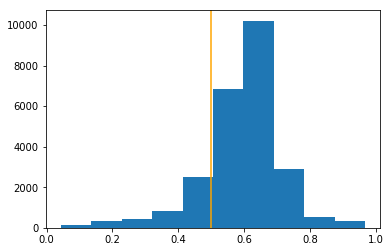

In [14]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [15]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'66.71'

In [ ]:
test complete; Gopal